In [1]:
import pandas as pd

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [4]:
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [5]:
# data cleaning
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates.copy()[['Time','US_dollar']]

In [7]:
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

In [8]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [9]:
euro_to_dollar['US_dollar'].value_counts()

US_dollar
1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: count, Length: 3527, dtype: int64

In [10]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

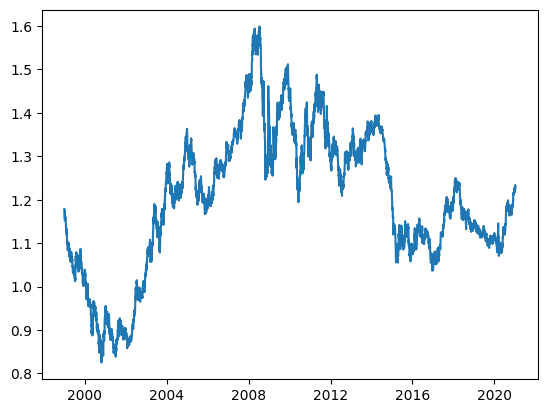

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Enables Jupyter to display graphs

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

In [12]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

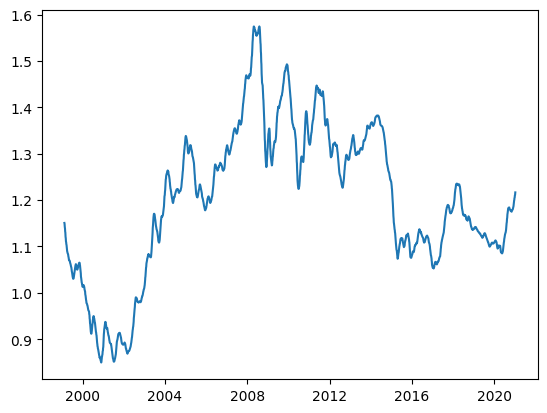

In [13]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In [14]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          5637 non-null   datetime64[ns]
 1   US_dollar     5637 non-null   float64       
 2   rolling_mean  5608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 176.2 KB


In [15]:
import datetime as dt
bush = euro_to_dollar[(euro_to_dollar['Time']> dt.datetime(2001, 1, 19)) & (euro_to_dollar['Time']< dt.datetime(2009, 1, 21))]
obama = euro_to_dollar[(euro_to_dollar['Time']> dt.datetime(2009, 1, 19)) & (euro_to_dollar['Time']< dt.datetime(2017, 1, 21))]
trump = euro_to_dollar[(euro_to_dollar['Time']> dt.datetime(2017, 1, 19)) & (euro_to_dollar['Time']< dt.datetime(2021, 1, 21))]

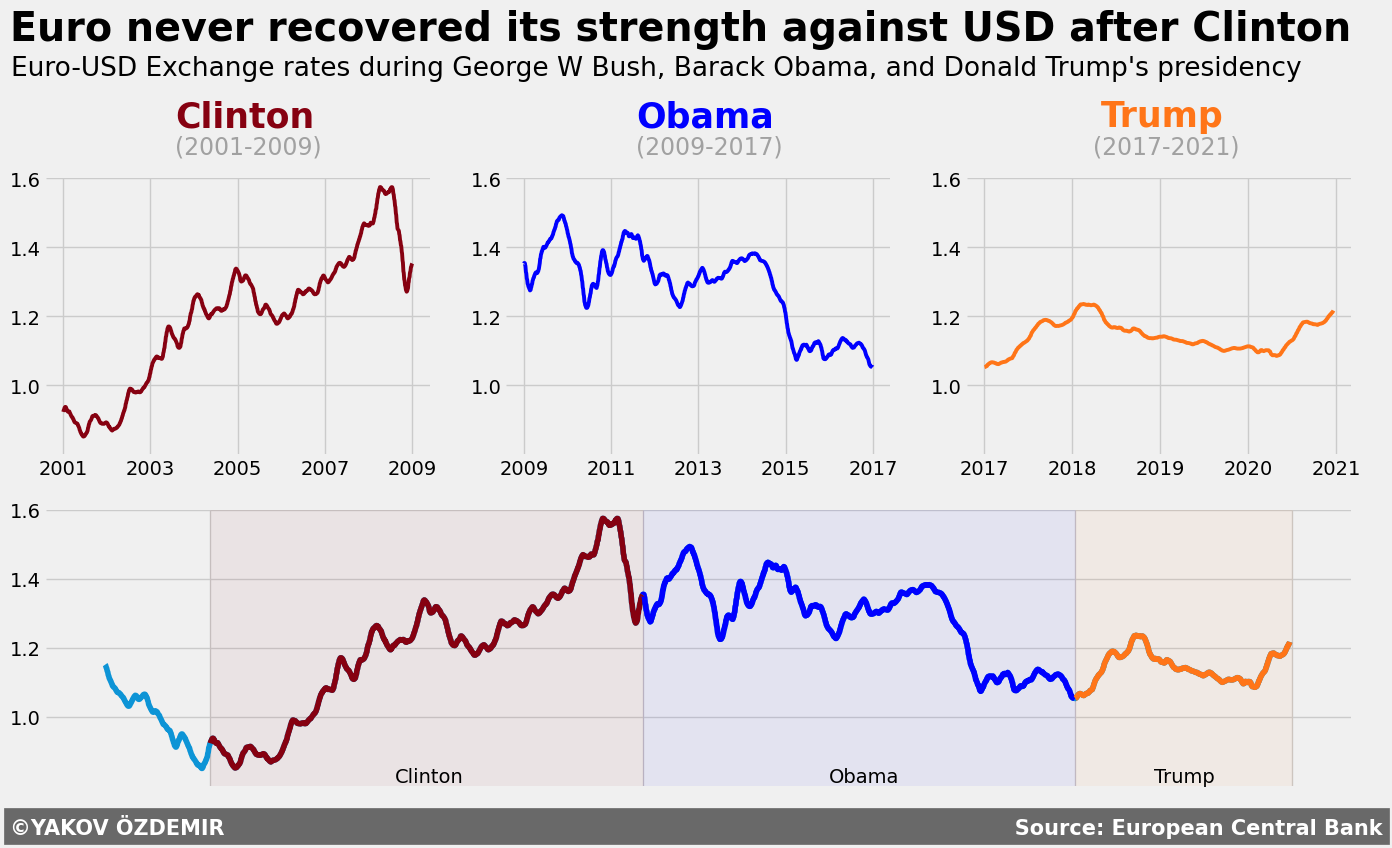

In [129]:
# add data to the first row
import matplotlib.style as style
style.use('fivethirtyeight')
plt.figure(figsize = (15,7.5))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]
#removed the spines and ticks
for ax in axes:
     for location in ['left', 'right', 'bottom', 'top']:
            ax.spines[location].set_visible(False)
            ax.tick_params(bottom=0, top=0, left=0, right=0)
            ax.set_ylim([0.8,1.6])
            ax.set_yticks([1.0,1.2,1.4,1.6])

ax1.plot(bush['Time'],bush['rolling_mean'], color = '#860111', lw =2.8)
bush_presidency = [dt.datetime(2001,1,20), dt.datetime(2003,1,20),dt.datetime(2005,1,20),dt.datetime(2007,1,20),dt.datetime(2009,1,20) ]
ax1.set_xticks(bush_presidency)
ax1.set_xticklabels(['2001','2003','2005','2007','2009'])
ax1.text(12280,1.75,'Clinton',size=25,weight='bold',color='#860111')
ax1.text(12275,1.67,'(2001-2009)',size=17,alpha=0.7,color='#808080')



ax2.plot(obama['Time'],obama['rolling_mean'], color = '#0000FF', lw =2.8)
obama_presidency = [dt.datetime(2009,1,20), dt.datetime(2011,1,20),dt.datetime(2013,1,20),dt.datetime(2015,1,20),dt.datetime(2017,1,20) ]
ax2.set_xticks(obama_presidency)
ax2.set_xticklabels(['2009','2011','2013','2015','2017'])
ax2.text(15202,1.75,'Obama',size=25,weight='bold',color='#0000FF')
ax2.text(15199,1.67,'(2009-2017)',size=17,alpha=0.7,color='#808080')




ax3.plot(trump['Time'],trump['rolling_mean'], c ='#FF7518', lw =2.8)
trump_presidency = [dt.datetime(2017,1,20), dt.datetime(2018,1,20),dt.datetime(2019,1,20),dt.datetime(2020,1,20),dt.datetime(2021,1,20) ]
ax3.set_xticks(trump_presidency)
ax3.set_xticklabels(['2017','2018','2019','2020','2021'])
ax3.text(17670,1.75,'Trump',size=25,weight='bold',color='#FF7518')
ax3.text(17635,1.67,'(2017-2021)',size=17,alpha=0.7,color='#808080')




ax4.plot('Time','rolling_mean',data = euro_to_dollar,alpha=0.95)
presidencies = [dt.datetime(2001,1,20),dt.datetime(2009,1,20),dt.datetime(2017,1,20),dt.datetime(2021,1,20)]
ax4.set_xticks(presidencies)
ax4.set_xticklabels([])
ax4.text(12590,0.81,'Clinton')
ax4.text((14264+17186)/2-200,0.81,'Obama')
ax4.text((17186+18647)/2-200,0.81,'Trump')

ax4.axvspan(11342,14264, color = '#860111',alpha=0.05)
ax4.axvspan(14264,17186, color = '#0000FF',alpha=0.05)
ax4.axvspan(17186,18647, color = '#FF7518',alpha=0.05)
ax4.plot('Time','rolling_mean', data=bush, color = '#860111')
ax4.plot('Time','rolling_mean', data=obama, color = '#0000FF')    
ax4.plot('Time','rolling_mean', data=trump, color = '#FF7518')


ax1.text(10900, 2.0, 'Euro never recovered its strength against USD after Clinton', weight='bold', size = 28.5)
ax1.text(10905, 1.9,'''Euro-USD Exchange rates during George W Bush, Barack Obama, and Donald Trump\'s presidency''', size=19)

ax1.text(10900,-0.3,'©YAKOV ÖZDEMIR' + 109*' ' + 'Source: European Central Bank', color = 'white', backgroundcolor = 'dimgray', weight = 'bold', size = 15)


plt.show()